### 1. Understanding of Problem

1. predict faults on train's door of  the first five months of 2015 by using training data set (from Jan. to Dec. 2014).
2. If #1 is predicted, discriminate between normal faults and critical faults.

#### (0) Hyposis before seeing data 
What can cause faults on train's door? 
- period/frequency of use : 오래, 자주 쓰면 고장날 확률이 높을 것이다.
- Weather – 온도, 습도가 높다면 고장날 확률이 높을 것이다. 
- Time of the Day – peak 시간대(사람이 많은) 고장날 확률이 높을 것이다. (특정 시간대..like 출퇴근, 특정 요일, 공휴일 등)
- Natural Disaster – 자연 재해가 있었다면 고장날 확률이 높을 것이다. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

%matplotlib inline

In [187]:
train = pd.read_csv('./input/input_training.csv', sep = '|')

In [188]:
train.tail(3)

,id,hour,id_rame,cn_744efe1402,cn_33c89fc161,cn_8c99622abb,cn_77a37e5f86,cn_409f0ae5ea,cn_44f963924c,cn_45bb1796d3,...,pluie_maxi,pluie_mini,pluie_moyenne,temp_gradient_maxi,temp_gradient_mini,temp_maxi,temp_mini,temp_moyenne,week_day,week_number
16784,16809,6.0,82c2e40c8d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.033333,0.033333,8.4,8.3,8.35,1.0,48
16785,16810,17.0,72e59b230d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.800000,-0.800000,11.8,9.4,10.60,1.0,52
16786,16811,6.0,cca56e5fa8,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,-0.033333,-0.033333,3.5,3.4,3.45,6.0,1


In [189]:
print(len(train['id'].unique()))

16787


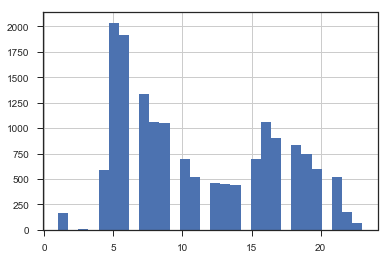

In [190]:
train['hour'].hist(bins=30)

In [191]:
train['id_rame'].value_counts()
# 기차의 id: 147개

b5de2dbb00    197
06c7a8b157    190
e7b3403262    187
ebdf94011e    186
374f2ffcae    183
f482136efa    183
f0b9a78fa2    182
3df3ef7180    181
faa5835e61    180
6c8eb91b8a    177
97571b8073    176
aa9b8b9044    176
7d75e4a38d    169
d30595052c    168
98eae08d70    167
3c60f1fb2a    167
a71f6cf447    166
500a0417f6    164
c0b59ffdfa    163
e98ed4d57f    161
9a62a3a013    161
f160c3560a    160
6c549e70e5    158
9d7f92ed34    157
47bc86489c    156
33665d6f95    156
e619604752    154
755cc1d5bc    154
359a7ce354    153
1d542bd17a    152
             ... 
62d5c494b8     70
7bdf09ee84     69
987205668f     68
2942c74446     68
cae777d92b     64
d1351e76c2     64
9d9d6afba6     63
5ad9f09d8a     63
8e0516e8f4     63
56f2afe155     62
ffdeda7d66     62
bd36c36eb4     62
29d37a31e3     59
bdfb8f763a     57
d3d8eddb27     54
e214d09ec3     53
9b2237d925     52
531251fd31     48
caadf44c62     42
f545851a5d     39
0745d2923f     35
b66a030b73     31
dcdeefc01a     28
d971933edd     27
82c2e40c8d

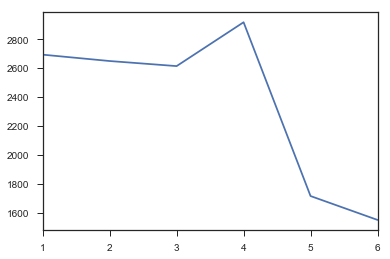

In [192]:
train['week_day'].value_counts().sort_index().plot()
# 일요일 제외한 월~토만..

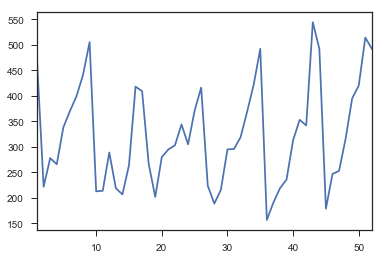

In [193]:
train['week_number'].value_counts().sort_index().plot()

In [194]:
output_train = pd.read_csv('./input/output_data_training.csv', sep=';')

In [195]:
output_train.tail(3)

,id,target_0,target_1,target_2
16784,16809,0,1,0
16785,16810,0,0,1
16786,16811,0,1,0


In [196]:
output_train['target_0'].value_counts()
# 총 16787중 fault 없는 것 16210번, 있는 것 577번

1    16210
0      577
Name: target_0, dtype: int64

In [197]:
output_train['target_1'].value_counts()
# 577 번 중 514번은 non-critical한 fault

0    16273
1      514
Name: target_1, dtype: int64

In [198]:
output_train['target_2'].value_counts()
# 577번 중 63번은 critical한 fault

0    16724
1       63
Name: target_2, dtype: int64

In [199]:
test = pd.read_csv('./input/input_testing.csv', sep = '|')
test.shape

(4623, 1511)

In [200]:
test['id_rame'].value_counts() 
# 기차의 id : 158개 (2014년 data 147개 대비 11개 증가_신규차량으로 보임)

47bc86489c    57
f0a31c6acf    48
a71f6cf447    47
06c7a8b157    46
6cbf625cb7    46
d2fe2f5c56    45
bc032ea8d1    45
a80492ca93    45
1ebbacca95    45
dbf96fd140    44
dcdeefc01a    44
9011014c0d    43
e7b3403262    43
31f55eeb1f    43
359a7ce354    42
f0b9a78fa2    42
4363927133    41
9a62a3a013    41
af587cf2f8    41
6dd5664ce6    41
9f1f1a7686    40
9d650f7513    40
62d5c494b8    40
f482136efa    40
bdfb8f763a    40
86b14e7341    39
926133078a    39
f9e2ba5fd1    39
3df3ef7180    39
231fed05bb    38
              ..
f39c17addb    20
5f99d6711d    20
e214d09ec3    19
f160c3560a    19
2f4c1ffeb1    19
cc478810db    19
301fb7a3bc    19
29d37a31e3    19
28e98f31db    19
33665d6f95    19
2942c74446    19
987205668f    18
53dba6eea5    18
716ada0fa3    18
97f69adbed    18
d1351e76c2    17
caadf44c62    16
a5f84cccbc    15
b5de2dbb00    15
12d236af85    14
b07edf3e0e    14
1d68545e36    13
b4a433b927    13
c9556ae498    13
faa5835e61    13
cca56e5fa8    12
c97ff0ef28     9
47754678e7    

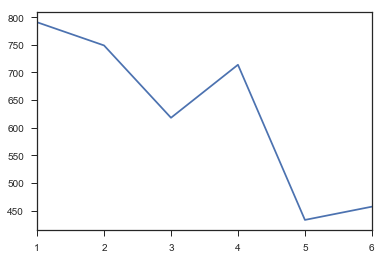

In [201]:
test['week_day'].value_counts().sort_index().plot()

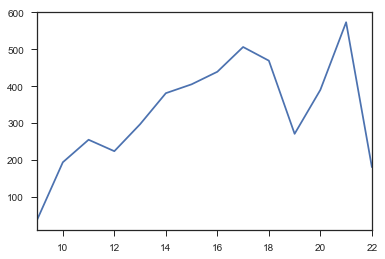

In [202]:
test['week_number'].value_counts().sort_index().plot()

In [203]:
# train dataset과 output 결합 (for EDA)
train_df = pd.merge(train, output_train, on = "id")
train_df.tail(3)

,id,hour,id_rame,cn_744efe1402,cn_33c89fc161,cn_8c99622abb,cn_77a37e5f86,cn_409f0ae5ea,cn_44f963924c,cn_45bb1796d3,...,temp_gradient_maxi,temp_gradient_mini,temp_maxi,temp_mini,temp_moyenne,week_day,week_number,target_0,target_1,target_2
16784,16809,6.0,82c2e40c8d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033333,0.033333,8.4,8.3,8.35,1.0,48,0,1,0
16785,16810,17.0,72e59b230d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.800000,-0.800000,11.8,9.4,10.60,1.0,52,0,0,1
16786,16811,6.0,cca56e5fa8,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,-0.033333,-0.033333,3.5,3.4,3.45,6.0,1,0,1,0


In [204]:
# target_0, 1, 2 직관적 이름으로 변경
train_df = train_df.rename(columns = {"target_0" : "faultless", "target_1" : "non_critical", "target_2" : "critical"})
train_df.tail(3)

,id,hour,id_rame,cn_744efe1402,cn_33c89fc161,cn_8c99622abb,cn_77a37e5f86,cn_409f0ae5ea,cn_44f963924c,cn_45bb1796d3,...,temp_gradient_maxi,temp_gradient_mini,temp_maxi,temp_mini,temp_moyenne,week_day,week_number,faultless,non_critical,critical
16784,16809,6.0,82c2e40c8d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033333,0.033333,8.4,8.3,8.35,1.0,48,0,1,0
16785,16810,17.0,72e59b230d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.800000,-0.800000,11.8,9.4,10.60,1.0,52,0,0,1
16786,16811,6.0,cca56e5fa8,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,-0.033333,-0.033333,3.5,3.4,3.45,6.0,1,0,1,0


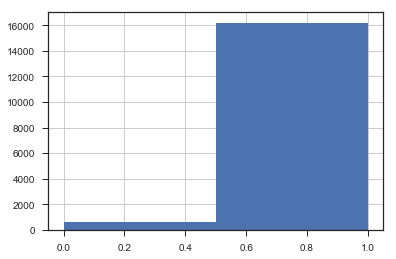

In [205]:
# Step 1. fault 여부(target_0) 먼저 예측. (추후 fault 있다면 critical or non-critical 분류)
train_df['faultless'].hist(bins=2)

In [214]:
# Step 2. 종속 변수 살펴보기
train_df.columns

Index(['id', 'hour', 'id_rame', 'cn_744efe1402', 'cn_33c89fc161',
       'cn_8c99622abb', 'cn_77a37e5f86', 'cn_409f0ae5ea', 'cn_44f963924c',
       'cn_45bb1796d3',
       ...
       'temp_gradient_maxi', 'temp_gradient_mini', 'temp_maxi', 'temp_mini',
       'temp_moyenne', 'week_day', 'week_number', 'faultless', 'non_critical',
       'critical'],
      dtype='object', length=1514)

크게 3가지로 분류 가능
  1. technical data : cn_x (특정 code x의 발생 횟수), cpt_x (얼마나 사용됐는지 나타내는 지표)
  2. 환경 요인: humidite_x (습도), pluie_x (강우량), temp_x (기온)
  3. 시계열: week_day, week_number, hour

In [235]:
id_cols = ['id', 'id_rame']
cn_cols = [col for col in train_df.columns if 'cn_' in col]
cpt_cols = [col for col in train_df.columns if 'cpt_' in col]
humi_cols = [col for col in train_df.columns if 'humidite_' in col]
rain_cols = [col for col in train_df.columns if 'pluie_' in col]
temp_cols = [col for col in train_df.columns if 'temp_' in col]
time_cols = ['hour', 'week_day', 'week_number']

In [236]:
## 1. technical data 따로 분류
df_cn = train_df.filter(regex='cn_')
df_cn.shape 
# 1140개의 code 중 fault 발생과 상관관계가 높은 것이 있을 수 있다.

(16787, 1140)

In [237]:
train_cn = train_df[cn_cols]
train_cn = pd.concat([train_cn, train_df['faultless']], axis=1)
train_cn.head()

,cn_744efe1402,cn_33c89fc161,cn_8c99622abb,cn_77a37e5f86,cn_409f0ae5ea,cn_44f963924c,cn_45bb1796d3,cn_b1ec3f44cb,cn_2aa15bd40b,cn_eb8ac0f5d5,...,cn_96c63adead,cn_bfc89dc0f9,cn_cc9370012f,cn_fc77821768,cn_9b78007404,cn_84b2c7fa01,cn_b40b7e7840,cn_ceb03bb914,cn_f0e6845808,faultless
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [238]:
train_cn.isnull().any()

cn_744efe1402     True
cn_33c89fc161     True
cn_8c99622abb     True
cn_77a37e5f86     True
cn_409f0ae5ea     True
cn_44f963924c     True
cn_45bb1796d3     True
cn_b1ec3f44cb     True
cn_2aa15bd40b     True
cn_eb8ac0f5d5     True
cn_f6987d1201     True
cn_323bb1c344     True
cn_2ea6a76360     True
cn_4d743db768     True
cn_0c670e7ddf     True
cn_8f55f9758e     True
cn_5f4705ed0b     True
cn_919f961e4f     True
cn_c5c137f1bd     True
cn_8bffdfbe26     True
cn_9141473f1a     True
cn_2fb5572847     True
cn_a55b15bcb1     True
cn_101f185515     True
cn_d47d6f46ce     True
cn_7643018bf7     True
cn_e05d2bd792     True
cn_0b0cbcaae3     True
cn_14e9005b14     True
cn_7b79e08a65     True
                 ...  
cn_d9a91c924b     True
cn_e7c2d0b64d     True
cn_c71181f4b2     True
cn_86818d9382     True
cn_8a6675877c     True
cn_3ac29dc780     True
cn_97e8b7c2ff     True
cn_7d3b87a8dc     True
cn_fb266e7718     True
cn_09fddab817     True
cn_cb3b7fe47b     True
cn_a1e0de5953     True
cn_b61e828d

In [239]:
train_cn.fillna(0, inplace=True)
train_cn.head()

,cn_744efe1402,cn_33c89fc161,cn_8c99622abb,cn_77a37e5f86,cn_409f0ae5ea,cn_44f963924c,cn_45bb1796d3,cn_b1ec3f44cb,cn_2aa15bd40b,cn_eb8ac0f5d5,...,cn_96c63adead,cn_bfc89dc0f9,cn_cc9370012f,cn_fc77821768,cn_9b78007404,cn_84b2c7fa01,cn_b40b7e7840,cn_ceb03bb914,cn_f0e6845808,faultless
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [278]:
temp_0 = train_cn.groupby("faultless").sum().transpose()
temp_1 = temp_0[temp_0[0] != 0] # 1140가지의 code 중 fault가 있을 때 1번이라도 count가 된 것은 595개
temp_1.shape

(595, 2)

In [288]:
# cpt: technical meter 로 frequency of use를 알수 있음. 355개의 meter 존재함. 각 기차별로 확인 필요함.
df_cpt = train_df.filter(regex='cpt_')
df_cpt.tail()

,cpt_7996eda668,cpt_a54775157a,cpt_812be8b224,cpt_25979b5267,cpt_4805d68e3a,cpt_3b9171c88c,cpt_29737f8238,cpt_505b935afb,cpt_8ab44c2146,cpt_2f6a0951e6,...,cpt_3250ec0fdc,cpt_a43bd0dbe9,cpt_17fb2c2de2,cpt_c977e9be39,cpt_773ab55625,cpt_7fc8c0c6ce,cpt_38597b825b,cpt_8eeccd5f4b,cpt_7e7e4c9f70,cpt_68190a93d1
16782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16784,3.940000,3.940000,5.220000,5.220000,6816.18,6816.18,28.990000,28.990000,194.410000,151.900000,...,664.8,145.1,3610.0,NaN,1.0,105.0,375.6,143.9,672.9,672.9
16785,63.605719,63.605719,120.746063,120.746063,107389.20,107389.20,14192.946475,14192.946475,24578.955937,17564.775117,...,6493.8,2056.8,50340.0,NaN,1.0,3405.0,3926.6,2049.5,6567.6,6567.6
16786,2.590000,2.590000,3.380000,3.380000,4267.98,4267.98,5.850000,5.850000,119.720000,26.500000,...,353.5,86.1,1810.0,10.0,18.0,80.0,223.8,86.1,357.6,357.6


In [297]:
train_cpt = train_df[cpt_cols]
train_cpt = pd.concat([train_df['id_rame'], train_cpt], axis = 1)
train_cpt = pd.concat([train_cpt, train_df['faultless']], axis=1)
train_cpt.tail()

,id_rame,cpt_7996eda668,cpt_a54775157a,cpt_812be8b224,cpt_25979b5267,cpt_4805d68e3a,cpt_3b9171c88c,cpt_29737f8238,cpt_505b935afb,cpt_8ab44c2146,...,cpt_a43bd0dbe9,cpt_17fb2c2de2,cpt_c977e9be39,cpt_773ab55625,cpt_7fc8c0c6ce,cpt_38597b825b,cpt_8eeccd5f4b,cpt_7e7e4c9f70,cpt_68190a93d1,faultless
16782,126e0d3dfc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16783,82c2e40c8d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16784,82c2e40c8d,3.940000,3.940000,5.220000,5.220000,6816.18,6816.18,28.990000,28.990000,194.410000,...,145.1,3610.0,NaN,1.0,105.0,375.6,143.9,672.9,672.9,0
16785,72e59b230d,63.605719,63.605719,120.746063,120.746063,107389.20,107389.20,14192.946475,14192.946475,24578.955937,...,2056.8,50340.0,NaN,1.0,3405.0,3926.6,2049.5,6567.6,6567.6,0
16786,cca56e5fa8,2.590000,2.590000,3.380000,3.380000,4267.98,4267.98,5.850000,5.850000,119.720000,...,86.1,1810.0,10.0,18.0,80.0,223.8,86.1,357.6,357.6,0


In [298]:
# 전처리 - NaN 값 0으로 치환
train_cpt.fillna(0, inplace=True)
train_cpt.tail()

,id_rame,cpt_7996eda668,cpt_a54775157a,cpt_812be8b224,cpt_25979b5267,cpt_4805d68e3a,cpt_3b9171c88c,cpt_29737f8238,cpt_505b935afb,cpt_8ab44c2146,...,cpt_a43bd0dbe9,cpt_17fb2c2de2,cpt_c977e9be39,cpt_773ab55625,cpt_7fc8c0c6ce,cpt_38597b825b,cpt_8eeccd5f4b,cpt_7e7e4c9f70,cpt_68190a93d1,faultless
16782,126e0d3dfc,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16783,82c2e40c8d,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16784,82c2e40c8d,3.940000,3.940000,5.220000,5.220000,6816.18,6816.18,28.990000,28.990000,194.410000,...,145.1,3610.0,0.0,1.0,105.0,375.6,143.9,672.9,672.9,0
16785,72e59b230d,63.605719,63.605719,120.746063,120.746063,107389.20,107389.20,14192.946475,14192.946475,24578.955937,...,2056.8,50340.0,0.0,1.0,3405.0,3926.6,2049.5,6567.6,6567.6,0
16786,cca56e5fa8,2.590000,2.590000,3.380000,3.380000,4267.98,4267.98,5.850000,5.850000,119.720000,...,86.1,1810.0,10.0,18.0,80.0,223.8,86.1,357.6,357.6,0


In [307]:
temp_b = train_cpt.groupby(['id_rame', 'faultless']).mean()
temp_b

cpt_7996eda668  cpt_a54775157a  cpt_812be8b224  \
id_rame    faultless                                                   
06c7a8b157 0               17.336737       17.336737       31.567588   
           1               58.308100       58.314568       81.834406   
0745d2923f 1               13.249524       13.249524       19.410495   
109f03f322 0                8.027942        8.027942       12.933805   
           1               12.880902       12.880902       21.372663   
126e0d3dfc 0                0.000000        0.000000        0.000000   
           1               24.304969       24.304969       35.765260   
12d236af85 1                1.095000        1.095000        1.330000   
158739e44d 0               34.740083       34.740083       54.778772   
           1               32.278457       32.278457       57.247422   
18eb8a77b8 0                2.135774        2.135774        3.846837   
           1               52.771494       52.771310       56.088398   
1d542bd17a 0               37.455186       37.455186       73.222111   
           1               72.020386       72.028773      102.806539   
1d68545e36 1               61.936672       61.921197       69.650825   
1eb63bba5f 0                8.091648        8.091648       15.742545   
           1               26.855089       21.865849       31.615148   
2093e02188 0                9.957777        9.957777       17.530250   
           1               29.473291       29.473291       48.676772   
231fed05bb 1                1.814286        1.814286        2.652857   
2942c74446 0                0.927335        0.927335        1.439636   
           1               38.217619       34.864044       49.280947   
29a4dff7b1 0               24.595006       24.595006       45.603908   
           1               50.300039       48.835802       77.752065   
29d37a31e3 0              211.321907      125.168347      170.630685   
           1              943.231199      543.348638      750.549456   
2c49bd2504 0               11.437934       11.437934       20.875408   
           1               39.913838       39.918626       62.750900   
2f4c1ffeb1 0                0.000000        0.000000        0.000000   
           1               35.984977       35.984977       54.959777   
...                              ...             ...             ...   
ecd0061ac7 0              332.797599      332.932936      352.040716   
           1              953.619088      954.015512      974.630366   
f0a31c6acf 0              380.923612      380.923612      413.331149   
           1               45.695843       45.695843       71.160734   
f0b9a78fa2 0               47.048127       47.048127       78.876958   
           1               41.666194       41.666194       62.716306   
f160c3560a 0               16.623794       16.623794       29.678799   
           1               53.152970       49.885096       48.378139   
f1f06be998 0               25.560025       25.560025       44.576252   
           1               53.672182       52.008809       72.353088   
f39c17addb 0                0.000000        0.000000        0.000000   
           1               53.317094       50.581282       69.215034   
f482136efa 0               25.377206       25.377206       40.955520   
           1               53.198019       50.357648       71.428427   
f4f111fbef 1               37.141995       35.099892       43.849333   
f545851a5d 1               21.325812       19.640682       32.402101   
f91059014e 0               25.811847       25.811847       47.086320   
           1               49.281534       48.830212       74.108219   
f9cf208e96 0               62.648593       29.788541       42.714707   
           1               87.965596       58.355231       73.517899   
f9e2ba5fd1 0               42.076877       42.076877       66.435084   
           1               48.848665       44.840604       56.460044   
fa024a9ee7 0               17.835542       17.835542       33.

In [306]:
temp_a = train_cpt.groupby("id_rame")["faultless"].value_counts()
temp_a

id_rame     faultless
06c7a8b157  1            188
            0              2
0745d2923f  1             35
109f03f322  1             72
            0              5
126e0d3dfc  1            134
            0              1
12d236af85  1              2
158739e44d  1            103
            0             10
18eb8a77b8  1            133
            0              2
1d542bd17a  1            145
            0              7
1d68545e36  1            139
1eb63bba5f  1            116
            0              4
2093e02188  1             84
            0              3
231fed05bb  1             14
2942c74446  1             62
            0              6
29a4dff7b1  1            142
            0              6
29d37a31e3  1             53
            0              6
2c49bd2504  1            127
            0              7
2f4c1ffeb1  1            148
            0              1
                        ... 
ecd0061ac7  1             89
            0              9
f0a31c6acf  1        

In [ ]:
temp_1 = temp_0[temp_0[0] != 0] # 1140가지의 code 중 fault가 있을 때 1번이라도 count가 된 것은 595개
temp_1.shape

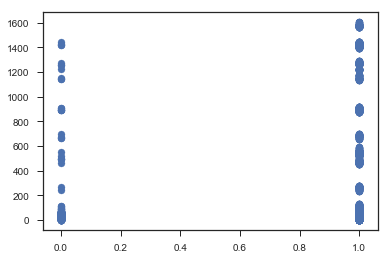

In [23]:
plt.scatter(train_df["faultless"], df_cpt["cpt_7996eda668"])
plt.show()

In [ ]:
for var in des_var:
    print var
    plt.scatter(dfx_des[var], dfy["Price"])
    plt.show()

In [ ]:
# with plt.style.context(('seaborn-ticks')):
#    sns_plot = sns.pairplot(pd.concat([train_df.faultless, df_cpt], axis=1) ,size=2)

In [29]:
# 2. 환경요인 따로 분류
humi_cols = [col for col in train_df.columns if 'humidite_' in col]
df_humi = train_df.filter(regex='humidite_')

In [32]:
rain_cols = [col for col in train_df.columns if 'pluie_' in col]
df_rain = train_df.filter(regex='pluie_')

In [26]:
temp_cols = [col for col in train_df.columns if 'temp_' in col]
df_temp = train_df.filter(regex='temp_')

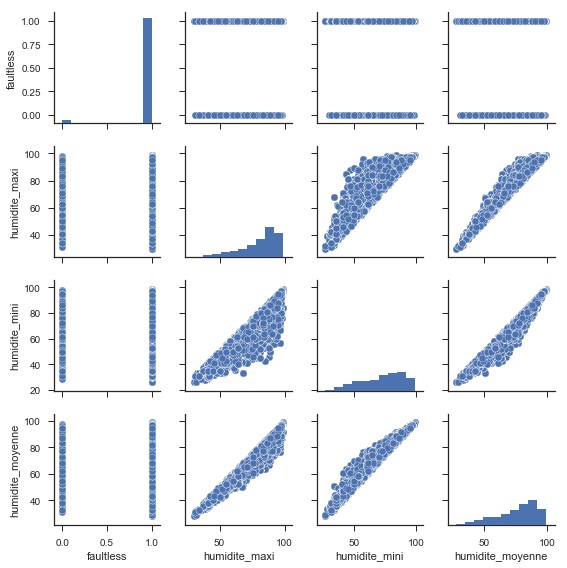

In [30]:
with plt.style.context(('seaborn-ticks')):
    sns_plot = sns.pairplot(pd.concat([train_df.faultless, df_humi], axis=1) ,size=2)

In [38]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 0 to 16786
Data columns (total 3 columns):
pluie_maxi       4098 non-null float64
pluie_mini       1713 non-null float64
pluie_moyenne    4273 non-null float64
dtypes: float64(3)
memory usage: 1.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C90FF92A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C90FDFC630>]], dtype=object)

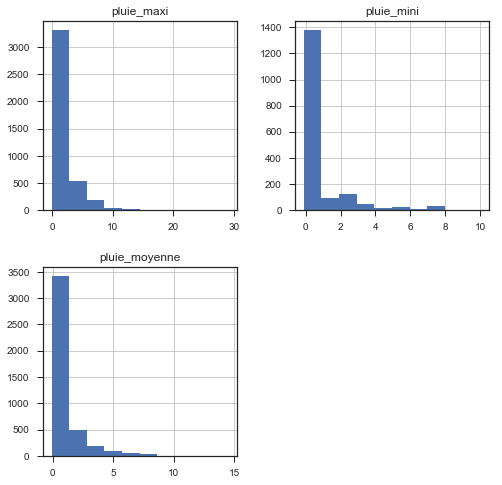

In [41]:
df_rain[df_rain.dtypes[(df_rain.dtypes=="float64")|(df_rain.dtypes=="float64")]
                        .index.values].hist(figsize=[8,8])

In [42]:
df_rain.isnull().any()

pluie_maxi       True
pluie_mini       True
pluie_moyenne    True
dtype: bool

In [46]:
df_rain.fillna(0, inplace=True)

In [47]:
df_rain.tail()

,pluie_maxi,pluie_mini,pluie_moyenne
16782,0.0,0.0,0.0
16783,0.0,0.0,0.0
16784,0.0,0.0,0.0
16785,0.0,0.0,0.0
16786,0.0,0.0,0.0


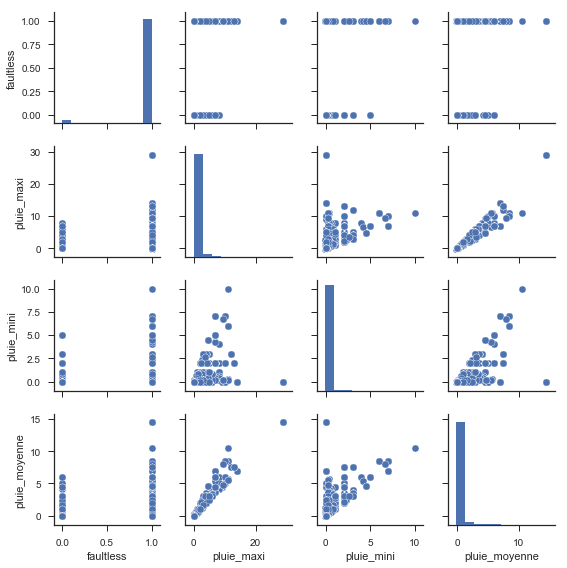

In [48]:
with plt.style.context(('seaborn-ticks')):
    sns_plot = sns.pairplot(pd.concat([train_df.faultless, df_rain], axis=1) ,size=2)

In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 0 to 16786
Data columns (total 5 columns):
temp_gradient_maxi    16371 non-null float64
temp_gradient_mini    16313 non-null float64
temp_maxi             16787 non-null float64
temp_mini             16782 non-null float64
temp_moyenne          16787 non-null float64
dtypes: float64(5)
memory usage: 1.4 MB


In [50]:
df_temp.isnull().any()

temp_gradient_maxi     True
temp_gradient_mini     True
temp_maxi             False
temp_mini              True
temp_moyenne          False
dtype: bool

In [51]:
df_temp.fillna(0, inplace=True)

In [52]:
df_temp.tail()

,temp_gradient_maxi,temp_gradient_mini,temp_maxi,temp_mini,temp_moyenne
16782,0.466667,0.466667,11.1,9.7,10.40
16783,0.033333,0.033333,19.6,19.5,19.55
16784,0.033333,0.033333,8.4,8.3,8.35
16785,-0.800000,-0.800000,11.8,9.4,10.60
16786,-0.033333,-0.033333,3.5,3.4,3.45


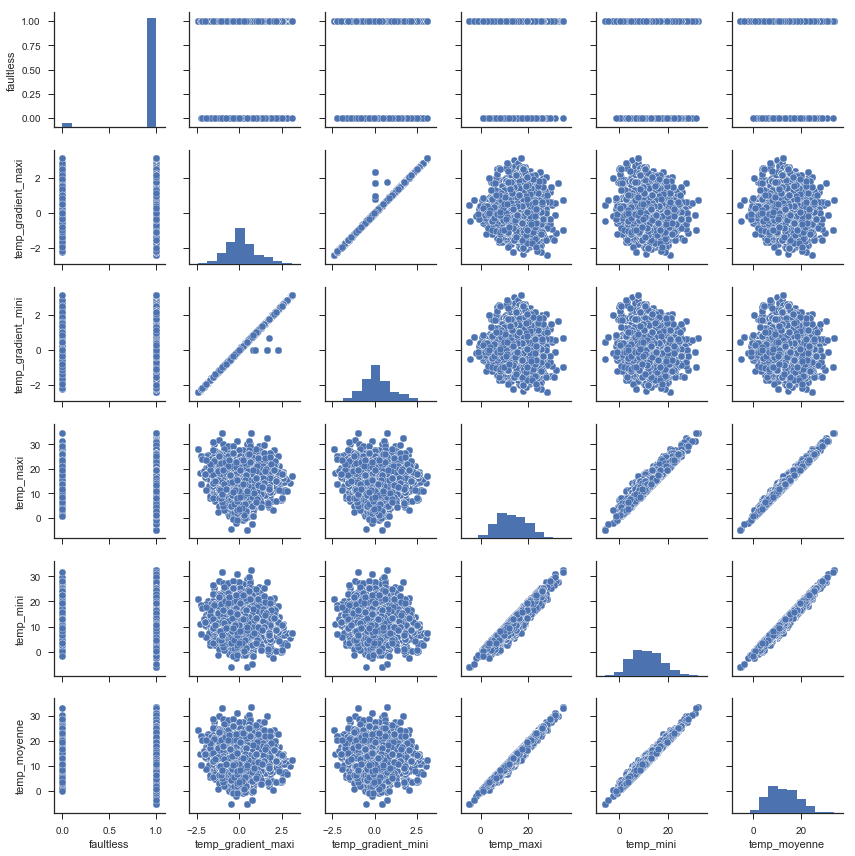

In [54]:
with plt.style.context(('seaborn-ticks')):
    sns_plot = sns.pairplot(pd.concat([train_df.faultless, df_temp], axis=1) ,size=2)

In [ ]:
temp = cn_data.cumsum()
cn_period = pd.DataFrame({"First" : temp.idxmin(),
                         "Last": temp.idxmax(),
                         "Count": cn_data.count()})
cn_period

In [107]:
train_id = train_df.groupby(['train_id', 'hour'])

In [108]:
train_id.size().sort_values(ascending = False)

train_id    hour
f91059014e  5.0     33
9d7f92ed34  5.0     30
6c8eb91b8a  5.0     30
db3d8bdabd  5.0     29
755cc1d5bc  5.0     28
c0b59ffdfa  6.0     28
97571b8073  5.0     27
94a5637a3d  5.0     27
3df3ef7180  5.0     26
374f2ffcae  5.0     26
4b34499570  5.0     26
c0b59ffdfa  5.0     26
926133078a  6.0     26
aa9b8b9044  5.0     26
33665d6f95  6.0     25
ebdf94011e  6.0     25
e7b3403262  5.0     25
06c7a8b157  5.0     25
e619604752  5.0     24
faa5835e61  5.0     24
a71f6cf447  5.0     24
aefbfa1d71  5.0     24
70abab5313  5.0     24
ebdf94011e  5.0     24
2c49bd2504  5.0     23
b5de2dbb00  5.0     23
98eae08d70  6.0     23
faa5835e61  6.0     23
f9e2ba5fd1  6.0     23
fa024a9ee7  5.0     23
                    ..
7bdf09ee84  8.0      1
78d19d70f0  13.0     1
            11.0     1
772bc888f8  15.0     1
81502e18a4  22.0     1
755cc1d5bc  22.0     1
72e59b230d  23.0     1
            22.0     1
            21.0     1
            19.0     1
            16.0     1
81502e18a4  1.0  

In [90]:
train_id = train_id.assign(total=total.values)

In [92]:
fault = train_id.total - train_id.faultless

In [93]:
train_id = train_id.assign(fault=fault.values)

In [94]:
train_id

,train_id,id,hour,cn_744efe1402,cn_33c89fc161,cn_8c99622abb,cn_77a37e5f86,cn_409f0ae5ea,cn_44f963924c,cn_45bb1796d3,...,temp_maxi,temp_mini,temp_moyenne,week_day,week_number,faultless,non_critical,critical,total,fault
0,06c7a8b157,1466941,2020.0,17.0,NaN,NaN,NaN,NaN,55.0,NaN,...,2503.8,2148.1,2325.950000,547.0,4635,188,1,1,197,9
1,0745d2923f,503823,436.0,1.0,NaN,NaN,NaN,NaN,25.0,NaN,...,379.9,325.9,352.900000,74.0,1530,35,0,0,190,155
2,109f03f322,685929,959.0,3.0,NaN,NaN,NaN,NaN,106.0,NaN,...,1102.8,933.8,1019.450000,165.0,2292,72,5,0,187,115
3,126e0d3dfc,952936,1321.0,5.0,NaN,NaN,NaN,NaN,35.0,NaN,...,1657.2,1377.3,1518.916667,318.0,3243,134,1,0,186,52
4,12d236af85,31472,21.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,16.3,13.5,14.900000,3.0,102,2,0,0,183,181
5,158739e44d,853261,1128.0,6.0,NaN,NaN,NaN,NaN,24.0,NaN,...,1489.6,1274.9,1384.550000,330.0,2757,103,10,0,183,80
6,18eb8a77b8,1492369,1467.0,6.0,NaN,NaN,NaN,NaN,33.0,NaN,...,2045.5,1791.6,1918.550000,366.0,4737,133,2,0,182,49
7,1d542bd17a,1314400,1615.0,5.0,NaN,NaN,NaN,NaN,33.0,NaN,...,1981.0,1685.1,1833.050000,435.0,4237,145,6,1,181,36
8,1d68545e36,1113713,1529.0,4.0,NaN,NaN,NaN,NaN,23.0,NaN,...,1794.1,1528.9,1661.500000,345.0,3526,139,0,0,180,41
9,1eb63bba5f,914006,1283.0,1.0,NaN,NaN,NaN,NaN,28.0,NaN,...,1692.7,1426.6,1560.800000,330.0,2983,116,4,0,177,61


In [345]:
from sklearn.ensemble import RandomForestClassifier

In [346]:
clf = RandomForestClassifier()

In [370]:
X_train = train.drop('id', axis=1)
X_train = X_train.drop('id_rame', axis=1)
y_train = train_df['faultless']

In [371]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Columns: 1509 entries, hour to week_number
dtypes: float64(1508), int64(1)
memory usage: 193.3 MB


In [374]:
X_train.isnull().any()

hour                  False
cn_744efe1402         False
cn_33c89fc161         False
cn_8c99622abb         False
cn_77a37e5f86         False
cn_409f0ae5ea         False
cn_44f963924c         False
cn_45bb1796d3         False
cn_b1ec3f44cb         False
cn_2aa15bd40b         False
cn_eb8ac0f5d5         False
cn_f6987d1201         False
cn_323bb1c344         False
cn_2ea6a76360         False
cn_4d743db768         False
cn_0c670e7ddf         False
cn_8f55f9758e         False
cn_5f4705ed0b         False
cn_919f961e4f         False
cn_c5c137f1bd         False
cn_8bffdfbe26         False
cn_9141473f1a         False
cn_2fb5572847         False
cn_a55b15bcb1         False
cn_101f185515         False
cn_d47d6f46ce         False
cn_7643018bf7         False
cn_e05d2bd792         False
cn_0b0cbcaae3         False
cn_14e9005b14         False
                      ...  
cpt_062bba5ff6        False
cpt_7f14c7974a        False
cpt_848f772cf9        False
cpt_80fda57d55        False
cpt_69dab86d95      

In [373]:
X_train.fillna(0, inplace=True)

In [357]:
X_eval = test.drop('id', axis=1)
X_eval = X_eval.drop('id_rame', axis=1)

In [358]:
X_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4623 entries, 0 to 4622
Columns: 1509 entries, hour to week_number
dtypes: float64(1508), int64(1)
memory usage: 53.2 MB


In [367]:
X_eval.isnull().any()

hour                  False
cn_744efe1402         False
cn_33c89fc161         False
cn_8c99622abb         False
cn_77a37e5f86         False
cn_409f0ae5ea         False
cn_44f963924c         False
cn_45bb1796d3         False
cn_b1ec3f44cb         False
cn_2aa15bd40b         False
cn_eb8ac0f5d5         False
cn_f6987d1201         False
cn_323bb1c344         False
cn_2ea6a76360         False
cn_4d743db768         False
cn_0c670e7ddf         False
cn_8f55f9758e         False
cn_5f4705ed0b         False
cn_919f961e4f         False
cn_c5c137f1bd         False
cn_8bffdfbe26         False
cn_9141473f1a         False
cn_2fb5572847         False
cn_a55b15bcb1         False
cn_101f185515         False
cn_d47d6f46ce         False
cn_7643018bf7         False
cn_e05d2bd792         False
cn_0b0cbcaae3         False
cn_14e9005b14         False
                      ...  
cpt_062bba5ff6        False
cpt_7f14c7974a        False
cpt_848f772cf9        False
cpt_80fda57d55        False
cpt_69dab86d95      

In [375]:
X_train.columns

Index(['hour', 'cn_744efe1402', 'cn_33c89fc161', 'cn_8c99622abb',
       'cn_77a37e5f86', 'cn_409f0ae5ea', 'cn_44f963924c', 'cn_45bb1796d3',
       'cn_b1ec3f44cb', 'cn_2aa15bd40b',
       ...
       'pluie_maxi', 'pluie_mini', 'pluie_moyenne', 'temp_gradient_maxi',
       'temp_gradient_mini', 'temp_maxi', 'temp_mini', 'temp_moyenne',
       'week_day', 'week_number'],
      dtype='object', length=1509)

In [360]:
X_eval.fillna(0, inplace=True)

In [376]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [377]:
pred_y = clf.predict(X_eval)

In [378]:
pred_y = pd.DataFrame(pred_y)

In [384]:
pred_y[0].value_counts()

1    4615
0       8
Name: 0, dtype: int64